<a href="https://colab.research.google.com/github/suntan-fruits/colab_notebooks/blob/master/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Classification 

* 작성자 : Jeaeun Jung
* 날짜 : 2020.02.03  

###1.데이터 불러오기
pandas 라이브러리를 이용해서 csv 파일을 표(dataframe)로 변환한다.

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("data.csv")

* `data.head(n)`은 **가장 상위** n개 데이터를 보여준다.
* `data.sample(n)`은 **임의의 데이터** n개를 추출하여 보여준다.
*` data.tail(n)`은 **가장 하위** n개 데이터를 보여준다.

In [3]:
data.head(3)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN

[3 rows x 33 columns]

In [4]:
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [5]:
data.sample(3)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
196     875938         M  ...                  0.09333          NaN
8       844981         M  ...                  0.10720          NaN
360  901034302         B  ...                  0.05521          NaN

[3 rows x 33 columns]

In [6]:
data.tail(3)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
566  926954         M  ...                  0.07820          NaN
567  927241         M  ...                  0.12400          NaN
568   92751         B  ...                  0.07039          NaN

[3 rows x 33 columns]

###2.각 Variable 분석하기
data['행의 이름']을 통해 series를 얻는다.
* **분류 데이터**의 경우 `value_counts()`를 통해 수의 분포를 알 수 있다.
* **연속형 자료**의 경우 `describe()`를 통해 분포의 정보를 알 수 있다.

In [7]:
diagnosis = data['diagnosis']
diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
radius = data['radius_mean']
radius.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [9]:
radius.describe().to_frame()

radius_mean
count   569.000000
mean     14.127292
std       3.524049
min       6.981000
25%      11.700000
50%      13.370000
75%      15.780000
max      28.110000

###3.데이터 시각화하기
* matplotlib와 seaborn을 이용하여 데이터를 그래프로 시각화한다.
* plt.show()를 통해 상위 글귀를 없앨 수 있다.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

> 분류형 자료의 경우 sns.countplot을 이용해 분포를 비교할 수 있다.

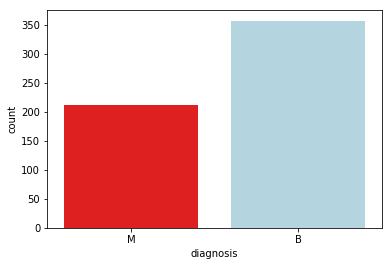

In [11]:
sns.countplot(diagnosis, palette=['red','lightblue'])
plt.show()

> 연속형 자료의 경우 sns.kdeplot을 이용해 분포를 파악할 수 있으며 shade=True 옵션을 통해 곡선 아래의 영역에 색을 더할 수 있다.

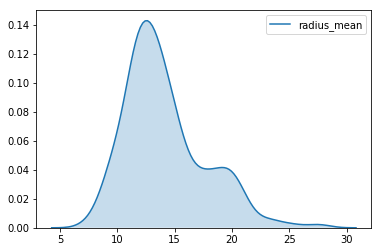

In [12]:
sns.kdeplot(radius, shade=True)
plt.show()

###4.모델을 이용해서 예측하기

1.우리가 예측하고자 하는 변량 분리하기

In [0]:
X = data.drop(['diagnosis','id','Unnamed: 32'],axis=1)
y = data['diagnosis']

In [14]:
X.head(3)

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758

[3 rows x 30 columns]

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=100)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [17]:
clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
predicitons = clf.predict(test_X)

In [19]:
from sklearn.metrics import accuracy_score

score = accuracy_score(predicitons, test_y)
print(score)

0.9


In [0]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()

In [21]:
clf1.fit(train_X, train_y)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions1 = clf1.predict(test_X)

In [23]:
score1 = accuracy_score(predictions1, test_y)
print(score1)

0.94


###2.성능 최적화하기
모델마다 실험해보아야 하는 변수들이 있다.
이를 **초모수(Hyperparameter)**라고 한다

In [0]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)

In [26]:
knn3.fit(train_X,train_y)
knn5.fit(train_X,train_y)
knn7.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
predictions2 = knn3.predict(test_X)
predictions3 = knn5.predict(test_X)
predictions4 = knn7.predict(test_X)

score2 = accuracy_score(predictions2, test_y)
score3 = accuracy_score(predictions3, test_y)
score4 = accuracy_score(predictions4, test_y)
print(score2,score3,score4)

(0.89, 0.9, 0.92)
